# header

In [1]:
'''
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}

setInterval(ConnectButton,60000);
'''

from google.colab import drive
from os import chdir

drive.mount('/content/drive')
project_path = '/content/drive/MyDrive/Gproject/MIT_glyco'
chdir(project_path)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import os
from os.path import exists
print(os.getcwd()) # current working directory

update = True

/content/drive/MyDrive/Gproject/MIT_glyco


In [3]:
load_name = "./data/data_for_ml.csv"
protein_list = list(pd.read_csv(load_name).protein.unique())
protein_augmented = [name for name in protein_list if exists(f'./data/data_for_ml(augmented)/{name}.csv')]

dataset = []
for name in protein_augmented:
    load_path = f'./data/data_for_ml(augmented)/{name}.csv'
    dataset.append(pd.read_csv(load_path))
dataset = pd.concat(dataset, axis=0).reset_index(drop=True)

positive = dataset[dataset['positivity']==1]

print("total number of proteins:          ", len(protein_list))
print("total number of augmented proteins:", len(protein_augmented))
print("total number of positive sites:    ", len(positive))

total number of proteins:           272
total number of augmented proteins: 89
total number of positive sites:     185


## parameter settings

In [4]:
from src.Data import *
from src.Preprocessing import *
from src.models import *

variables = xy_variables()
test_size = 0.2
valid_size = test_size/(1-test_size)

import random
random_state = 1
n_cv = 20

hpo_counts = 30
hpo_config = {
    "n_layers" : range(1,11),
    "n_neurons" : [16, 32, 64, 128, 256]
}
metrics = ['rnn_layers', 'rnn_neurons', 'dnn_layers', 'dnn_neurons', 
           'epoch', 'time', 'loss', 'val_loss', 'test_loss', 'accuracy', 'precision', 'recall', 'f1']
method = "random"

# model

In [5]:
model_name = 'augmented_rnn_important_features_only10'
x_important = pd.read_csv('./data/features-important-names.csv').column_name.to_list()
x_important

['net_charge_all_around_target_ser_thr',
 'number_of_arg',
 'number_of_g',
 'number_of_ser',
 'number_of_thr',
 'number_of_v',
 'HSE_alpha_down',
 'nAli',
 'nS/nT',
 'Tau(i-2=>i+2)',
 'all_atom_positive_charge_all_around_target_ser_thr',
 'all_atom_positive_charge_all_backbone_around_target_ser_thr',
 'all_atom_positive_charge_all_backbone_with_around_target_ser_thr',
 'all_atom_positive_charge_all_sidechain_around_target_ser_thr',
 'all_atom_positive_charge_all_with_around_target_ser_thr',
 'all_sasa_cys',
 'all_sasa_leu',
 'all_sasa_lys',
 'all_sasa_met',
 'all_sasa_phe',
 'exposed_charge_all_sidechain_with_around_target_ser_thr',
 'exposed_charge_all_with_around_target_ser_thr',
 'net_charge_all_backbone_around_target_ser_thr',
 'net_charge_all_backbone_with_around_target_ser_thr',
 'net_charge_all_sidechain_around_target_ser_thr',
 'net_charge_all_sidechain_with_around_target_ser_thr',
 'net_charge_all_with_around_target_ser_thr',
 'number_of_aromatic',
 'number_of_e',
 'number_of_

In [6]:
x_cts   = [
    'Tau(i-2=>i+2)', 'HSE_alpha_down',
    'net_charge_all_around_target_ser_thr',
    'number_of_arg',
    'number_of_g',
    'number_of_ser',
    'number_of_thr',
    'number_of_v',
]
x_cat   = ['SEQ',
           'nAli','nS/nT',]
y_label = variables.y_label

print(f"{len(x_cts)} x_cts")
print(f"{len(x_cat)} x_cat: {x_cat}")
print(f"{len(y_label)} y_label: {y_label}")

data_x, data_y = df_to_dummy(dataset, x_cts, x_cat, y_label)
display(dict(zip(range(len(data_x.columns)), data_x.columns)))

8 x_cts
3 x_cat: ['SEQ', 'nAli', 'nS/nT']
1 y_label: ['positivity']
dummy x shape: (59027, 48)
dummy y shape: (59027, 1)


{0: 'Tau(i-2=>i+2)',
 1: 'HSE_alpha_down',
 2: 'net_charge_all_around_target_ser_thr',
 3: 'number_of_arg',
 4: 'number_of_g',
 5: 'number_of_ser',
 6: 'number_of_thr',
 7: 'number_of_v',
 8: 'SEQ_A',
 9: 'SEQ_C',
 10: 'SEQ_D',
 11: 'SEQ_E',
 12: 'SEQ_F',
 13: 'SEQ_G',
 14: 'SEQ_H',
 15: 'SEQ_I',
 16: 'SEQ_K',
 17: 'SEQ_L',
 18: 'SEQ_M',
 19: 'SEQ_N',
 20: 'SEQ_P',
 21: 'SEQ_Q',
 22: 'SEQ_R',
 23: 'SEQ_S',
 24: 'SEQ_T',
 25: 'SEQ_V',
 26: 'SEQ_W',
 27: 'SEQ_Y',
 28: 'nAli_0',
 29: 'nAli_1',
 30: 'nAli_2',
 31: 'nAli_3',
 32: 'nS/nT_0',
 33: 'nS/nT_1',
 34: 'nS/nT_2',
 35: 'nS/nT_3',
 36: 'nS/nT_4',
 37: 'nS/nT_5',
 38: 'nS/nT_6',
 39: 'nS/nT_7',
 40: 'nS/nT_8',
 41: 'nS/nT_9',
 42: 'nS/nT_10',
 43: 'nS/nT_11',
 44: 'nS/nT_12',
 45: 'nS/nT_13',
 46: 'nS/nT_14',
 47: 'nS/nT_15'}

In [7]:
window_size = 10

rnn_input  = []
rnn_output = []

for name in protein_augmented:
    load_path = f'./data/data_for_ml(augmented)/{name}.csv'
    temp = pd.read_csv(load_path)
    temp_x, temp_y = custom_dummy(temp, x_cts, x_cat, y_label)
    
    temp_input, temp_output = data_to_sequence(temp_x, temp_y, window_size)
    rnn_input.append(temp_input)
    rnn_output.append(temp_output)
    
rnn_input  = np.concatenate(rnn_input, axis=0)
rnn_output = np.concatenate(rnn_output, axis=0)

print(f'rnn input shape : {rnn_input.shape}')
print(f'rnn output shape: {rnn_output.shape}')

rnn input shape : (8910, 21, 52)
rnn output shape: (8910, 1)


## cross validation

In [8]:
# select n_layers and n_neurons as the best values of HPO
rnn_layers = 2
rnn_neurons = 100
dnn_layers = 5
dnn_neurons = 100
cv_path = f'./result/cv_result_{model_name}_{rnn_layers}_{rnn_neurons}_{dnn_layers}_{dnn_neurons}_{n_cv}.csv'

cv_result = pd.DataFrame([], columns=metrics)
if not exists(cv_path) or update:
    for i in range(n_cv):
        print(f"\n{i+1}th iteration")
        random.seed(i+1)
        train_x, train_y, test_x, test_y, _, _ = stratified_split(rnn_input, rnn_output, 
                                                              test_size=test_size, random_state=i+1, 
                                                              scale_x=x_cts, scale_y=[])
        train_x, train_y = up_sampling(train_x, train_y) 

        history_size = train_x.shape[1]
        x_dim = train_x.shape[2]
        y_dim = train_y.shape[1]
        save_path  = f'./h5/{model_name}_{rnn_layers}_{rnn_neurons}_{dnn_layers}_{dnn_neurons}_cv_{i+1}of{n_cv}.h5'

        model = RNN(history_size, x_dim, y_dim)
        model.build(rnn_layers, rnn_neurons, dnn_layers, dnn_neurons)
        if not exists(save_path) or update:
            model.train(train_x, train_y, valid_data=[test_x, test_y], save_path=save_path, verbose=2)
        else:
            model.load_model(save_path)

        epoch = model.epoch
        time = model.time
        loss = model.loss
        val_loss = model.val_loss
        test_loss, accuracy, precision, recall, f1 = model.evaluate(test_x, test_y)
        cv = pd.DataFrame([[rnn_layers, rnn_neurons, dnn_layers, dnn_neurons, epoch, time, loss, val_loss, test_loss, accuracy, 
                             precision[1], recall[1], f1[1]]], columns=metrics)
        cv_result = pd.concat([cv_result, cv], axis=0)
    cv_result = cv_result.reset_index(drop=True)
    cv_result.to_csv(cv_path, index=False)    
    
else:
    cv_result = pd.read_csv(cv_path)

display(cv_result)


1th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
Epoch 1/10000
437/437 - 12s - loss: 0.4467 - accuracy: 0.7827 - val_loss: 0.3538 - val_accuracy: 0.8412 - 12s/epoch - 27ms/step
Epoch 2/10000
437/437 - 3s - loss: 0.1691 - accuracy: 0.9420 - val_loss: 0.2498 - val_accuracy: 0.9198 - 3s/epoch - 6ms/step
Epoch 3/10000
437/437 - 3s - loss: 0.0913 - accuracy: 0.9736 - val_loss: 0.2766 - val_accuracy: 0.9641 - 3s/epoch - 6ms/step
Epoch 4/10000
437/437 - 3s - loss: 0.0622 - accuracy: 0.9831 - val_loss: 0.3111 - val_accuracy: 0.9568 - 3s/epoch - 7ms/step
Epoch 5/10000
437/437 - 3s - loss: 0.0490 - accuracy: 0.9869 - val_loss: 0.2480 - val_accuracy: 0.9635 - 3s/epoch - 8ms/step
Epoch 6/10000
437/437 - 3s - loss: 0.0381 - accuracy: 0.9899 - val_loss: 0.2476 - val_accuracy: 0.9703 - 3s/epoch - 6ms/step
Epoch 7/10000
437/437 - 3s -

,rnn_layers,rnn_neurons,dnn_layers,dnn_neurons,epoch,time,loss,val_loss,test_loss,accuracy,precision,recall,f1
0,2,100,5,100,15,2.400,0.010488,0.174929,0.174929,97.25,34.21,35.14,34.67
1,2,100,5,100,10,2.100,0.020550,0.179728,0.179728,96.18,21.82,32.43,26.09
2,2,100,5,100,17,2.434,0.004825,0.192202,0.192202,96.41,22.45,29.73,25.58
3,2,100,5,100,54,4.173,0.013574,0.144651,0.144651,97.36,29.17,18.92,22.95
4,2,100,5,100,45,3.772,0.001281,0.153692,0.153692,97.47,39.47,40.54,40.00
5,2,100,5,100,3,1.723,0.054410,0.227536,0.227536,94.73,13.92,29.73,18.97
6,2,100,5,100,16,2.394,0.012711,0.199034,0.199034,96.91,25.00,24.32,24.66
7,2,100,5,100,18,2.485,0.016622,0.185087,0.185087,96.35,20.83,27.03,23.53
8,2,100,5,100,31,3.096,0.003753,0.139893,0.139893,96.75,27.66,35.14,30.95
9,2,100,5,100,10,2.120,0.031305,0.184197,0.184197,96.41,20.00,24.32,21.95



1th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_1of20.h5


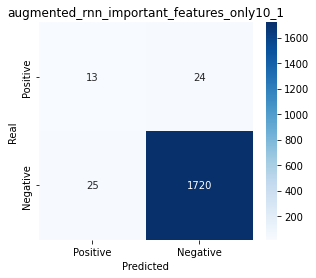

accuracy  : 97.25
precision : [98.62 34.21]
recall    : [98.57 35.14]
f1_score  : [98.6  34.67]

2th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_2of20.h5


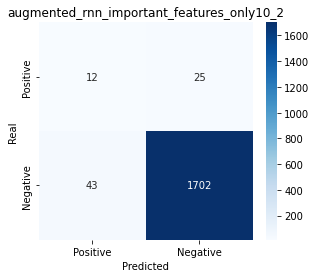

accuracy  : 96.17999999999999
precision : [98.55 21.82]
recall    : [97.54 32.43]
f1_score  : [98.04 26.09]

3th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_3of20.h5


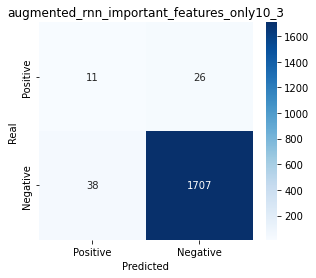

accuracy  : 96.41
precision : [98.5  22.45]
recall    : [97.82 29.73]
f1_score  : [98.16 25.58]

4th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_4of20.h5


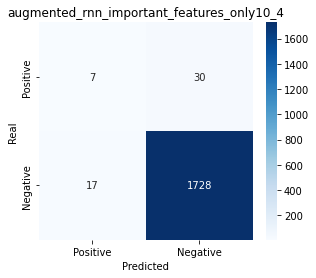

accuracy  : 97.36
precision : [98.29 29.17]
recall    : [99.03 18.92]
f1_score  : [98.66 22.95]

5th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_5of20.h5


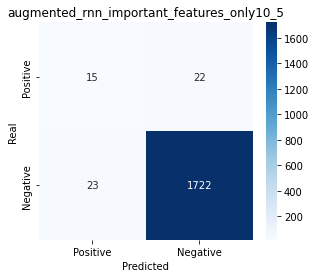

accuracy  : 97.47
precision : [98.74 39.47]
recall    : [98.68 40.54]
f1_score  : [98.71 40.  ]

6th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_6of20.h5


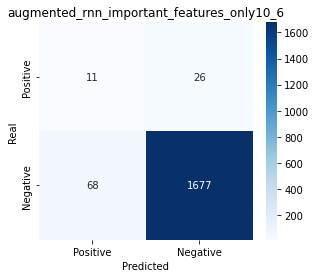

accuracy  : 94.73
precision : [98.47 13.92]
recall    : [96.1  29.73]
f1_score  : [97.27 18.97]

7th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_7of20.h5


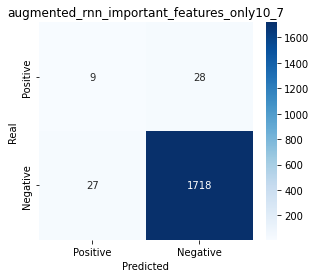

accuracy  : 96.91
precision : [98.4 25. ]
recall    : [98.45 24.32]
f1_score  : [98.42 24.66]

8th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0030864197530864
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_8of20.h5


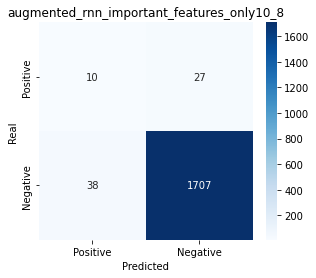

accuracy  : 96.35000000000001
precision : [98.44 20.83]
recall    : [97.82 27.03]
f1_score  : [98.13 23.53]

9th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_9of20.h5


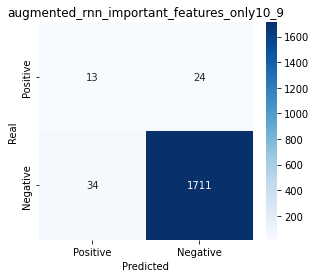

accuracy  : 96.75
precision : [98.62 27.66]
recall    : [98.05 35.14]
f1_score  : [98.33 30.95]

10th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_10of20.h5


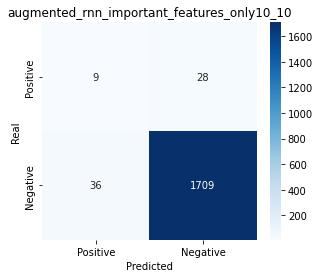

accuracy  : 96.41
precision : [98.39 20.  ]
recall    : [97.94 24.32]
f1_score  : [98.16 21.95]

11th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_11of20.h5


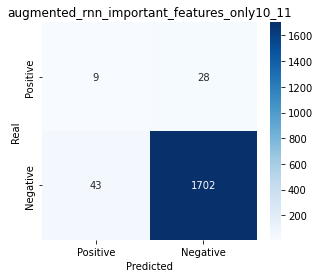

accuracy  : 96.02000000000001
precision : [98.38 17.31]
recall    : [97.54 24.32]
f1_score  : [97.96 20.22]

12th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_12of20.h5


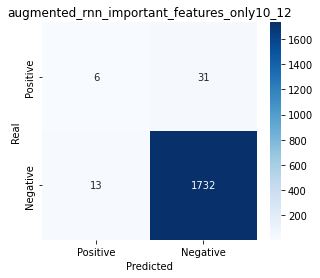

accuracy  : 97.53
precision : [98.24 31.58]
recall    : [99.26 16.22]
f1_score  : [98.75 21.43]

13th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_13of20.h5


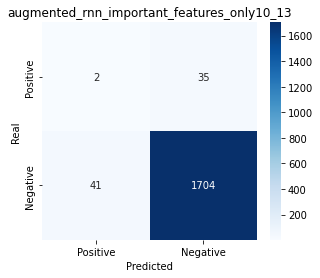

accuracy  : 95.74000000000001
precision : [97.99  4.65]
recall    : [97.65  5.41]
f1_score  : [97.82  5.  ]

14th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_14of20.h5


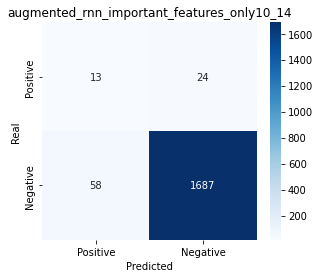

accuracy  : 95.39999999999999
precision : [98.6  18.31]
recall    : [96.68 35.14]
f1_score  : [97.63 24.07]

15th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_15of20.h5


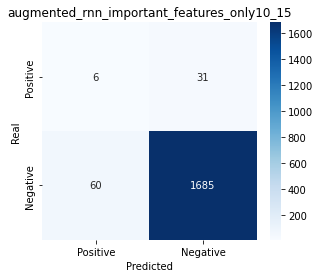

accuracy  : 94.89
precision : [98.19  9.09]
recall    : [96.56 16.22]
f1_score  : [97.37 11.65]

16th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_16of20.h5


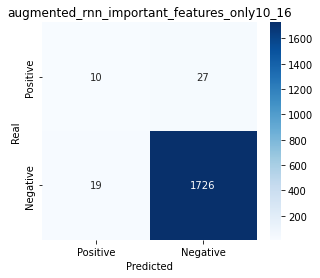

accuracy  : 97.42
precision : [98.46 34.48]
recall    : [98.91 27.03]
f1_score  : [98.68 30.3 ]

17th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_17of20.h5


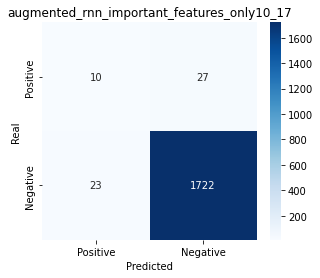

accuracy  : 97.19
precision : [98.46 30.3 ]
recall    : [98.68 27.03]
f1_score  : [98.57 28.57]

18th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_18of20.h5


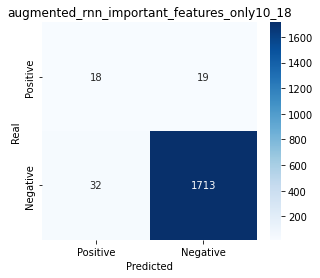

accuracy  : 97.14
precision : [98.9 36. ]
recall    : [98.17 48.65]
f1_score  : [98.53 41.38]

19th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_19of20.h5


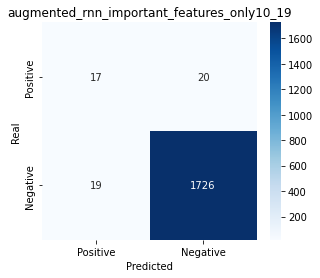

accuracy  : 97.81
precision : [98.85 47.22]
recall    : [98.91 45.95]
f1_score  : [98.88 46.58]

20th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 52) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 52) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 52) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_only10_2_100_5_100_cv_20of20.h5


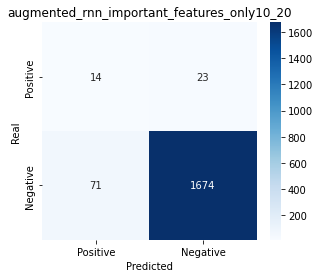

accuracy  : 94.73
precision : [98.64 16.47]
recall    : [95.93 37.84]
f1_score  : [97.27 22.95]


In [9]:
from src.graph_plot import *

for i in range(n_cv):
    print(f"\n{i+1}th iteration")
    random.seed(i+1)
    train_x, train_y, test_x, test_y, _, _ = stratified_split(rnn_input, rnn_output, 
                                                          test_size=test_size, random_state=i+1, 
                                                          scale_x=x_cts, scale_y=[])
    train_x, train_y = up_sampling(train_x, train_y)

    history_size = train_x.shape[1]
    x_dim = train_x.shape[2]
    y_dim = train_y.shape[1]
    save_path  = f'./h5/{model_name}_{rnn_layers}_{rnn_neurons}_{dnn_layers}_{dnn_neurons}_cv_{i+1}of{n_cv}.h5'

    model = RNN(history_size, x_dim, y_dim)
    model.build(rnn_layers, rnn_neurons, dnn_layers, dnn_neurons)
    model.load_model(save_path)
    
    prediction = model.model.predict(test_x, verbose=0)
    y_pred = prediction.round(0).astype(int)
    y_real = test_y
    
    plot_confusion(y_real, y_pred, title=model_name+f"_{i+1}", label=["Positive","Negative"])